In [2]:
import bs4 as bs
import urllib.request
import pandas as pd
import requests
import re
import matplotlib.pyplot as plt

CUSTOM_PALETTE = ['#000000','#FF0000', '#008000', '#0000FF', '#800080', '#FFC300', '#800000', '#808080', '#00FF00', '#FF00FF']

# Projet

In [4]:
headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
    }

In [3]:
re.compile(r'\bclass1\b')

re.compile(r'\bclass1\b', re.UNICODE)

## TopAchat (Prend jusqu'à 3 minutes)
### Pour éviter cette perte de temps, nous avons joint le csv créés après le scrapping et le traitement des données obtenues grâces aux celulles ci-dessous :

In [4]:
pages_links = ["https://www.topachat.com/pages/produits_cat_est_micro_puis_rubrique_est_wgfx_pcie.html"]
for page in [2,3,4,5]:
    pages_links.append(f"https://www.topachat.com/pages/produits_cat_est_micro_puis_rubrique_est_wgfx_pcie_puis_page_est_{page}.html")
    
descriptions = []
for page_url in pages_links:
    req = requests.get(page_url, headers)
    soup = bs.BeautifulSoup(req.content, 'html.parser')
    links = soup.find_all('a', href=True)
    links = [i["href"] for i in links]
    links = ["https://www.topachat.com"+ i for i in links if i.endswith(".html") and i.startswith("/pages/detail2_cat_est_micro_puis_rubrique_est_wgfx")]
    for url in links:
        req = requests.get(url, headers)
        soup = bs.BeautifulSoup(req.content, 'html.parser')
        titles = soup.find_all('div', {"class": "caracName"})
        desc = soup.find_all('div', {"class": "caracDesc"})
        name = soup.find('h1')
        prix = soup.find('span', {"class": "offer-price__price"})
        description = {
            "Nom_produit": name.text,
            "Prix": prix.text
        }
        titles, desc = [x.text.rstrip() for x in titles], [x.text.rstrip() for x in desc]
        description.update(dict(zip(titles,desc)))
        descriptions.append(description)

df = pd.DataFrame(descriptions)

In [5]:
df

,Nom_produit,Prix,Architecture du chipset graphique,LHR,Bus,Mémoire,Fréquence d'horloge,Bande passante mémoire,Interface mémoire,Finesse de gravure,...,Fréquence GPU,Connectique,API supportées,Support HDCP,Connecteur d'alimentation,Tensor TFLOPS,RT TFLOPS,Shader TFLOPS,Consommation,Alimentation
0,KFA2 GeForce RTX 3060 Ti (1-Click OC) (LHR) + ...,509.99 €,Ampere,Oui,PCI Express 4.0,8 Go GDDR6,Base : 1 410 MHz Boost : 1 680 MHz,14 Gbps,256 bit,8 nm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gigabyte Radeon RX 6650 XT GAMING OC + Dead Is...,349.99 €,RDNA2,NaN,PCI Express 4.0,8 Go GDDR6,Game : 2 523 MHz Boost : 2 694 MHz,17.5 Gbps,128 bit,7 nm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KFA2 GeForce RTX 3060 (12 Go) (1-Click OC) (LH...,394.99 €,Ampere,Oui,PCI Express 4.0,12 Go GDDR6,Base : 1320 MHz Boost : 1777 MHz Via 1-Click...,15 Gbps,192 bit,8 nm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sapphire Radeon RX 6700 PULSE + Dead Island 2 ...,399.99 €,RDNA2,NaN,PCI Express 4.0,10 Go GDDR6,Base : 1941 MHz Game : 2230 MHz Boost : 2495...,16 Gbps,160 bit,7 nm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gigabyte Radeon RX 6750 XT GAMING OC + Dead Is...,519.99 €,RDNA2,NaN,PCI Express 4.0,12 Go GDDR6,Game : 2 533 MHz Boost : 2 623 MHz,18 Gbps,192 bit,7 nm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,AORUS GeForce RTX 4070 Ti ELITE (12 Go),1129.99 €,Ada Lovelace,Non,PCI Express 4.0,12 Go GDDR6X,Base : 2310 MHz Boost : 2655 MHz,21 Gbps,192 bit,4 nm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,AORUS GeForce RTX 4070 Ti MASTER (12 Go),1159.99 €,Ada Lovelace,Non,PCI Express 4.0,12 Go GDDR6X,Base : 2310 MHz Boost : 2670 MHz,21 Gbps,192 bit,4 nm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Gigabyte GeForce RTX 4070 Ti AERO OC (12 Go),1079.99 €,Ada Lovelace,Non,PCI Express 4.0,12 Go GDDR6X,Base : 2310 MHz Boost : 2640 MHz,21 Gbps,192 bit,4 nm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,MSI GeForce RTX 3060 Ti GAMING X TRIO GDDR6X (...,549.99 €,Ampere,Non,PCI Express 4.0,8 Go GDDR6X,Base : 1 410 MHz Boost : 1845 MHz,19 Gbps,256 bit,8 nm,...,NaN,NaN,NaN,Oui,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df["Marque"] = df["Nom_produit"].str.split().str[0]
df["Nom_produit"] = df["Nom_produit"].str.split("+").str[0]
df["Quantité Mémoire (Go)"], df["Type Mémoire"] = df["Mémoire"].str.split().str[0].astype(int), df["Mémoire"].str.split().str[2]
df["Bande passante mémoire (Gbps)"] = df["Bande passante mémoire"].str.split().str[0].fillna(0).astype(float)
df["Interface mémoire (bit)"] = df["Interface mémoire"].str.split().str[0].fillna(0).astype(int)
df["Finesse de gravure (nm)"] = df["Finesse de gravure"].str.split().str[0].fillna(0).astype(int)
df["Alimentation recommandée (W)"] = df["Alimentation recommandée"].str[:-1]
df["Prix (€)"] = df["Prix"].str.split().str[0].astype(float)
df["Chipset Graphique"] = df["Nom_produit"].str.split().str[1:4]
df["Chipset Graphique"] = df["Chipset Graphique"].apply(lambda x: ' '.join(x))
df["Longueur"], df["Largeur"], df["Epaisseur"] = df["Dimensions (L x l x H)"].str.split(" ").str[2], df["Dimensions (L x l x H)"].str.split(" ").str[4], df["Dimensions (L x l x H)"].str.split(" ").str[6]
df["Site Internet"] = "TopAchat.com"
df = df.drop(columns=["Mémoire", "Bande passante mémoire", "Interface mémoire", "Finesse de gravure", "Alimentation recommandée", "Prix"])

In [9]:
cols_to_keep = df.isna().sum()/df.shape[0]*100
cols_to_keep = cols_to_keep[cols_to_keep <= 10].index
df = df[cols_to_keep].dropna()

In [10]:
cols_to_keep

Index(['Nom_produit', 'Architecture du chipset graphique', 'Bus',
       'Fréquence d'horloge', 'Technologies supportées',
       'Compatible VR (Réalité virtuelle)', 'Résolution maximale', 'Sorties',
       'Connecteurs d'alimentation', 'Dimensions (L x l x H)', 'Marque',
       'Quantité Mémoire (Go)', 'Type Mémoire',
       'Bande passante mémoire (Gbps)', 'Interface mémoire (bit)',
       'Finesse de gravure (nm)', 'Alimentation recommandée (W)', 'Prix (€)',
       'Chipset Graphique', 'Longueur', 'Largeur', 'Epaisseur',
       'Site Internet'],
      dtype='object')

In [12]:
df = df.drop_duplicates("Nom_produit")

In [13]:
df.to_csv("TopAchat.csv", index=False)

In [14]:
df = pd.read_csv("TopAchat.csv")

## LDLC (peut prendre jusqu'à 15mn)
### Pour éviter cette perte de temps, nous avons joint le csv créés après le scrapping et le traitement des données obtenues grâces aux celulles ci-dessous :

In [ ]:
pages_links = ["https://www.ldlc.com/informatique/pieces-informatique/carte-graphique-interne/c4684/"]
for page in [2,3,4,5]:

    pages_links.append(pages_links[0]+ f"page{page}")

descriptions = []
all_links = []

for page_url in pages_links:
    req = requests.get(page_url, headers)
    soup = bs.BeautifulSoup(req.content, 'html.parser')
    links = soup.find_all('a', href=True)
    links = [i["href"] for i in links]
    links = ["https://www.ldlc.com"+i for i in links if i.endswith(".html") and i.startswith("/fiche")]
    all_links += links
    for url in all_links:
        titles = []
        desc = []
        req = requests.get(url, headers)
        soup = bs.BeautifulSoup(req.content, 'html.parser')
        
        for item in soup.find_all("tr"):
          title = item.find(class_='label')
          if(title == None):
              titles.append('None String')
              desc0 = item.find(class_='checkbox')
              if(desc0 == None):
                desc0 = 'desc none'
                desc.append(desc0)
              else:
                desc0 = desc0.text
                desc_temp.append(desc0)
                desc.append(desc_temp)
          else :
            desc_temp = []
            title = title.text
            titles.append(title)
            desc0 = item.find(class_='checkbox')
            if(desc0 == None):
              desc0 = 'desc none'
              desc.append(desc0)
            else:
              desc0 = desc0.text
              desc_temp.append(desc0)
              desc.append(desc0)
    
    
        name = soup.find('h1')
        prix = soup.find('div', {"class": "price"})
        description = {
            "Nom_produit": name.text,
            "Prix": prix.text
        }
                  
        description.update(dict(zip(titles,desc)))
        descriptions.append(description)


ldlc = pd.DataFrame(descriptions)

In [ ]:
ldlc = pd.read()

In [32]:
df_obj = ldlc.select_dtypes(['object'])
ldlc[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())


In [33]:
ldlc["Epaisseur"] = ldlc["Epaisseur"].fillna(-1)
cols_to_keep = ldlc.isna().sum()/ldlc.shape[0]*100
cols_to_keep = cols_to_keep[cols_to_keep <= 5].index
ldlc = ldlc[cols_to_keep].dropna()

In [34]:
ldlc["Chipset Graphique"] = ldlc["Chipset graphique"].str.split().str[1:4]
ldlc["Chipset Graphique"] = ldlc["Chipset Graphique"].apply(lambda x: ' '.join(x))
ldlc["Quantité Mémoire (Go)"] = ldlc["Taille mémoire vidéo"].str[:2]
ldlc["Bus"] = ldlc["Bus"].str[:-4]

In [35]:
ldlc['Prix'] = ldlc['Prix'].str.replace('€','.')

ldlc["Prix"] = ldlc["Prix"].str.replace(u'\xa0', u'').astype(float)
ldlc["Longueur"] = ldlc["Longueur"].str.split(" ").str[0]
ldlc["Largeur"] = ldlc["Largeur"].str.split(" ").str[0]
ldlc["Epaisseur"] = ldlc["Epaisseur"].str.split(" ").str[0]
ldlc = ldlc.rename(columns={"Prix": "Prix (€)", "Type de mémoire": "Type Mémoire"})
ldlc = ldlc.drop(columns=["Chipset graphique", "Taille mémoire vidéo"])
ldlc["Marque"] = ldlc["Nom_produit"].str.split().str[0]
ldlc["Site Internet"] = "ldlc.com"



In [36]:
ldlc = ldlc.drop_duplicates("Nom_produit")

In [37]:
ldlc

,Nom_produit,Prix (€),Désignation,Marque,Modèle,Marque du GPU,Overclockée,Nombre de GPU,Bus,Interface mémoire,...,Longueur,Largeur,Epaisseur,Utilisation,Garantie commerciale,Garantie légale,Reprise des produits usagés,Chipset Graphique,Quantité Mémoire (Go),Site Internet
0,ZOTAC GeForce RTX 4070 Ti Trinity,899.95,ZOTAC GeForce RTX 4070 Ti Trinity,ZOTAC,ZT-D40710D-10P,NVIDIA,Non,1,PCI Express 4.0,192 bit(s),...,307,120,59,Gamer NVIDIA RTX,desc none,desc none,desc none,GeForce RTX 4070,12,ldlc.com
1,MSI GeForce RTX 3060 VENTUS 2X 12G OC LHR,469.96,MSI GeForce RTX 3060 VENTUS 2X 12G OC LHR,MSI,GEFORCE RTX 3060 VENTUS 2X 12G OC,NVIDIA,Oui,1,PCI Express 4.0,192 bit(s),...,235,124,42,Gamer NVIDIA RTX,desc none,desc none,desc none,GeForce RTX 3060,12,ldlc.com
2,KFA2 GeForce RTX 3060 8GB (1-Click OC) LHR,379.96,KFA2 GeForce RTX 3060 8GB (1-Click OC) LHR,KFA2,36NSL8MD6OCK,NVIDIA,Oui,1,PCI Express 4.0,128 bit(s),...,258,126,41.5,Gamer NVIDIA RTX,desc none,desc none,desc none,GeForce RTX 3060,8,ldlc.com
3,MSI GeForce RTX 4070 Ti GAMING X TRIO 12G,1079.95,MSI GeForce RTX 4070 Ti GAMING X TRIO 12G,MSI,GEFORCE RTX 4070 TI GAMING X TRIO 12G,NVIDIA,Oui,1,PCI Express 4.0,192 bit(s),...,337,140,62,Gamer NVIDIA RTX,desc none,desc none,desc none,GeForce RTX 4070,12,ldlc.com
4,KFA2 GeForce RTX 3060 Ti (1-Click OC) LHR,519.95,KFA2 GeForce RTX 3060 Ti (1-Click OC) LHR,KFA2,36ISL6MD1VQK,NVIDIA,Oui,1,PCI Express 4.0,256 bit(s),...,256.5,131.5,41.5,Gamer NVIDIA RTX,desc none,desc none,desc none,GeForce RTX 3060,8,ldlc.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,ZOTAC GeForce RTX 4090 AMP Extreme AIRO,2149.94,ZOTAC GeForce RTX 4090 AMP Extreme AIRO,ZOTAC,ZT-D40900B-10P,NVIDIA,Oui,1,PCI Express 4.0,384 bit(s),...,355.5,165.8,72.1,Gamer NVIDIA RTX,desc none,desc none,desc none,GeForce RTX 4090,24,ldlc.com
1632,ZOTAC GeForce RTX 4070 Ti Trinity OC,999.95,ZOTAC GeForce RTX 4070 Ti Trinity OC,ZOTAC,ZT-D40710J-10P,NVIDIA,Oui,1,PCI Express 4.0,192 bit(s),...,307,120,59,Gamer NVIDIA RTX,desc none,desc none,desc none,GeForce RTX 4070,12,ldlc.com
1634,ZOTAC GeForce RTX 4080 Trinity,1519.94,ZOTAC GeForce RTX 4080 Trinity,ZOTAC,ZT-D40810D-10P,NVIDIA,Non,1,PCI Express 4.0,256 bit(s),...,356.1,150.1,71.4,Gamer NVIDIA RTX,desc none,desc none,desc none,GeForce RTX 4080,16,ldlc.com
1636,ZOTAC GeForce RTX 4090 Trinity,1949.95,ZOTAC GeForce RTX 4090 Trinity,ZOTAC,ZT-D40900D-10P,NVIDIA,Non,1,PCI Express 4.0,384 bit(s),...,356.1,165.4,71.4,Gamer NVIDIA RTX,desc none,desc none,desc none,GeForce RTX 4090,24,ldlc.com


# Lire ces fichiers 

In [38]:
ldlc.to_csv("LDLC.csv", index=False)

In [39]:
ldlc = pd.read_csv("LDLC.csv", encoding='utf-8')

In [ ]:
ldlc

# Mise en commun

In [40]:
colonnes_communes = ["Nom_produit", "Chipset Graphique", "Marque", "Quantité Mémoire (Go)", "Type Mémoire", "Bus", "Prix (€)", "Site Internet", "Longueur", "Largeur", "Epaisseur"]
df = df[colonnes_communes]
ldlc = ldlc[colonnes_communes]
df = df.applymap(lambda s: s.lower() if type(s) == str else s)
ldlc = ldlc.applymap(lambda s: s.lower() if type(s) == str else s)
df_glob = pd.concat([df, ldlc]).reset_index(drop=True)
df_glob["Type du GPU"] = df_glob["Chipset Graphique"].str.split().str[0]

def test_apply(x):
    try:
        return float(x)
    except ValueError:
        return -1

df_glob["Longueur"] = df_glob["Longueur"].apply(lambda x: test_apply(x))
df_glob["Largeur"] = df_glob["Largeur"].apply(lambda x: test_apply(x))
df_glob["Epaisseur"] = df_glob["Epaisseur"].apply(lambda x: test_apply(x))
df_glob = df_glob.fillna(-1)

In [41]:
df_glob.to_csv("Cartes_graphiques_formatees.csv", index=False)

In [42]:
df_glob = pd.read_csv("Cartes_graphiques_formatees.csv")

In [43]:
df_glob

,Nom_produit,Chipset Graphique,Marque,Quantité Mémoire (Go),Type Mémoire,Bus,Prix (€),Site Internet,Longueur,Largeur,Epaisseur,Type du GPU
0,kfa2 geforce rtx 3060 ti (1-click oc) (lhr),geforce rtx 3060,kfa2,8,gddr6,pci express 4.0,509.99,topachat.com,256.5,131.50,41.5,geforce
1,gigabyte radeon rx 6650 xt gaming oc,radeon rx 6650,gigabyte,8,gddr6,pci express 4.0,349.99,topachat.com,282.0,115.00,50.0,radeon
2,kfa2 geforce rtx 3060 (12 go) (1-click oc) (lhr),geforce rtx 3060,kfa2,12,gddr6,pci express 4.0,394.99,topachat.com,258.0,126.00,41.5,geforce
3,sapphire radeon rx 6700 pulse,radeon rx 6700,sapphire,10,gddr6,pci express 4.0,399.99,topachat.com,260.0,119.85,49.0,radeon
4,kfa2 geforce rtx 3050 ex (lhr),geforce rtx 3050,kfa2,8,gddr6,pci express 4.0,249.99,topachat.com,224.0,133.00,44.0,geforce
...,...,...,...,...,...,...,...,...,...,...,...,...
327,zotac geforce rtx 4090 amp extreme airo,geforce rtx 4090,zotac,24,gddr6x,pci express 4.0,2149.94,ldlc.com,355.5,165.80,72.1,geforce
328,zotac geforce rtx 4070 ti trinity oc,geforce rtx 4070,zotac,12,gddr6x,pci express 4.0,999.95,ldlc.com,307.0,120.00,59.0,geforce
329,zotac geforce rtx 4080 trinity,geforce rtx 4080,zotac,16,gddr6x,pci express 4.0,1519.94,ldlc.com,356.1,150.10,71.4,geforce
330,zotac geforce rtx 4090 trinity,geforce rtx 4090,zotac,24,gddr6x,pci express 4.0,1949.95,ldlc.com,356.1,165.40,71.4,geforce


In [44]:
df_glob.Longueur = pd.to_numeric(df_glob.Longueur, errors='coerce')
df_glob.Largeur = pd.to_numeric(df_glob.Largeur, errors='coerce')
df_glob.Epaisseur = pd.to_numeric(df_glob.Epaisseur, errors='coerce')

df_glob.Longueur = df_glob.Longueur.round()
df_glob.Largeur = df_glob.Largeur.round()
df_glob.Epaisseur = df_glob.Epaisseur.round()

### Commun est l'ensemble des produits qui ont un duplicat basé sur les colonnes suivantes : 'Marque', 'Chipset Graphique', 'Quantité Mémoire (Go)', 'Type Mémoire', 'Bus', 'Longueur', 'Largeur', 'Epaisseur'.

In [45]:
commun = df_glob[df_glob.duplicated(subset=['Chipset Graphique','Quantité Mémoire (Go)','Type Mémoire','Bus','Epaisseur','Longueur','Largeur'], keep=False)]

In [46]:
ldlc = commun[commun['Site Internet'] == 'ldlc.com']
topachat = commun[commun['Site Internet'] == 'topachat.com']

ldlc = ldlc.reset_index(drop=True)
topachat = topachat.reset_index(drop=True)

# On cherche ensuite pour chaque produit dans Topachat, le produit avec le nom le plus similaire dans ldlc : 

In [47]:
pip install rapidfuzz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.3 MB/s eta 0:00:00


In [48]:
import pandas as pd
from difflib import SequenceMatcher
from rapidfuzz import process, fuzz


# Create two sample DataFrames
df1 = topachat.copy()
df2 = ldlc.copy()
columns = topachat.columns

df_final = pd.DataFrame(columns=columns)
df_final['similarity'] = 0
for i in range(0,df1.shape[0]):
  # Select the target row from df1
  target = df1.iloc[i, :]
  target_row = df1.iloc[i, 0]

  most_similar = process.extractOne(target_row, df2['Nom_produit'], scorer=fuzz.WRatio)
  df_final = df_final.append(target, ignore_index=True)

  df_final = df_final.append(df2.iloc[most_similar[2],:], ignore_index=True)
  df_final.iloc[df_final.shape[0]-1,12] = round(most_similar[1])
  

In [49]:
df_final.to_csv('Version_temporaire_similitude_V2.csv', index=False)

In [50]:
df = df_final.copy()

# Transformation en nouveau tableau 

In [51]:
df_impair = df.iloc[1::2,:]
df_pair = df.iloc[::2,:]

df1 = df_impair.copy()
df2 = df_pair.copy()

In [52]:
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)


In [53]:
df1.rename(columns = {'Nom_produit':'Nom_produit_ldlc', 'Prix (€)':'Prix (€) ldlc'}, inplace = True)
df1.insert(1, "Nom_produit_topachat", df2['Nom_produit']) 

In [54]:
df1['Prix (€) topachat'] = df2['Prix (€)']
del df1['Site Internet']
del df1['similarity']

In [55]:
df1['Prix Moyen (€)'] = df1[['Prix (€) ldlc', 'Prix (€) topachat']].mean(axis=1)

In [56]:
df1 = df1[['Nom_produit_ldlc',	'Nom_produit_topachat','Prix (€) ldlc',	'Prix (€) topachat','Prix Moyen (€)', 'Chipset Graphique',	'Marque'	,'Quantité Mémoire (Go)',	'Type Mémoire',	'Bus'	,	'Longueur',	'Largeur',	'Epaisseur',	'Type du GPU']]

In [57]:
df1

,Nom_produit_ldlc,Nom_produit_topachat,Prix (€) ldlc,Prix (€) topachat,Prix Moyen (€),Chipset Graphique,Marque,Quantité Mémoire (Go),Type Mémoire,Bus,Longueur,Largeur,Epaisseur,Type du GPU
0,kfa2 geforce rtx 3060 ti (1-click oc) lhr,kfa2 geforce rtx 3060 ti (1-click oc) (lhr),519.95,509.99,514.970,geforce rtx 3060,kfa2,8,gddr6,pci express 4.0,256.0,132.0,42.0,geforce
1,gigabyte radeon rx 6650 xt gaming oc 8g,gigabyte radeon rx 6650 xt gaming oc,359.95,349.99,354.970,radeon rx 6650,gigabyte,8,gddr6,pci express 4.0,282.0,115.0,50.0,radeon
2,kfa2 geforce rtx 3060 (1-click oc) lhr,kfa2 geforce rtx 3060 (12 go) (1-click oc) (lhr),399.95,394.99,397.470,geforce rtx 3060,kfa2,12,gddr6,pci express 4.0,258.0,126.0,42.0,geforce
3,sapphire pulse radeon rx 6700 10gb,sapphire radeon rx 6700 pulse,439.96,399.99,419.975,radeon rx 6700,sapphire,10,gddr6,pci express 4.0,260.0,120.0,49.0,radeon
4,kfa2 geforce rtx 3050 ex (1-click oc) lhr,kfa2 geforce rtx 3050 ex (lhr),299.95,249.99,274.970,geforce rtx 3050,kfa2,8,gddr6,pci express 4.0,224.0,133.0,44.0,geforce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,msi radeon rx 7900 xt gaming trio classic 20g,msi radeon rx 7900 xt gaming trio classic,1129.96,1129.99,1129.975,radeon rx 7900,msi,20,gddr6,pci express 4.0,325.0,141.0,56.0,radeon
113,msi geforce rtx 4090 ventus 3x 24g oc,msi geforce rtx 4090 ventus 3x oc,2049.95,1999.99,2024.970,geforce rtx 4090,msi,24,gddr6x,pci express 4.0,322.0,136.0,62.0,geforce
114,pny geforce rtx 4080 16gb xlr8 gaming verto ep...,pny geforce rtx 4090 xlr8 verto epic-x rgb oc,1499.95,2149.99,1824.970,geforce rtx 4080,pny,16,gddr6x,pci express 4.0,332.0,137.0,72.0,geforce
115,asus tuf geforce rtx 3060 ti o8g gaming gddr6x...,asus geforce rtx 3060 ti tuf o8gd6x gaming (lhr),599.95,589.99,594.970,geforce rtx 3060,asus,8,gddr6x,pci express 4.0,302.0,142.0,54.0,geforce


# Dataviz

In [ ]:
df_glob = pd.read_csv("Cartes_graphiques_formatees.csv")

In [58]:
df_glob.groupby(["Marque", "Quantité Mémoire (Go)"]).count()[["Nom_produit"]].unstack().fillna(" ")

Nom_produit                                            
Quantité Mémoire (Go)          2    4    6     8    10    12    16   20    24
Marque                                                                       
aorus                                         1.0        2.0   2.0        2.0
asus                          1.0  8.0       16.0       14.0   9.0  2.0   9.0
evga                                    1.0   4.0                            
gainward                           2.0        9.0  1.0   3.0   8.0        4.0
gigabyte                      1.0  5.0       22.0       16.0  11.0  3.0   8.0
intel                                         1.0              1.0           
kfa2                               1.0  1.0   9.0        3.0   2.0        3.0
msi                           2.0  5.0       14.0  2.0  11.0   8.0  2.0  10.0
nvidia                                                                    1.0
palit                                         2.0        2.0                 
pny                                1.0        6.0        8.0   4.0        6.0
powercolor                                    4.0        2.0   1.0  4.0   6.0
sapphire                           3.0        7.0  2.0   3.0   3.0  6.0   6.0
zotac                                                    5.0   6.0        5.0

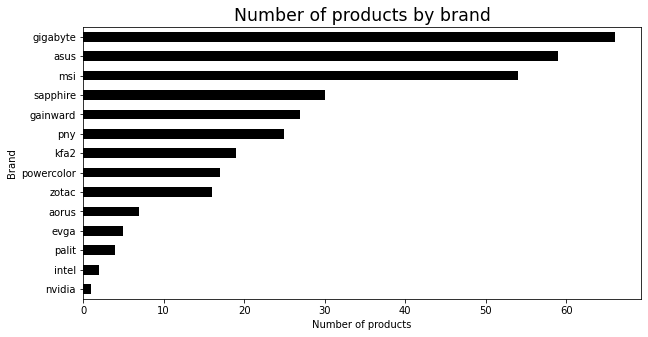

In [60]:
df_temp = df_glob.groupby("Marque").count()["Nom_produit"].sort_values().plot(kind="barh", figsize=(10,5), color="black")
plt.title("Number of products by brand", fontsize="xx-large")
plt.xlabel("Number of products")
plt.ylabel("Brand")
plt.savefig("nb_products_by_brand.png")
plt.show()

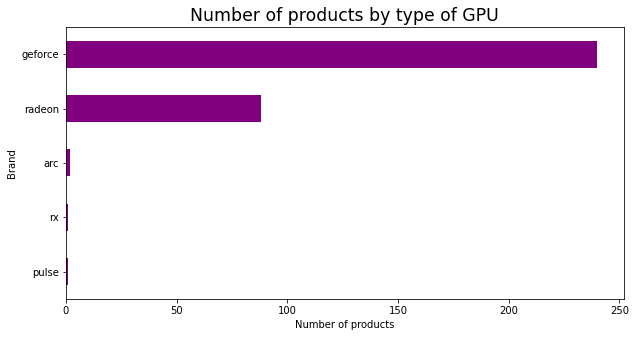

In [61]:
df_glob.groupby("Type du GPU").count()["Nom_produit"].sort_values().plot(kind="barh", figsize=(10,5), color="purple")
plt.title("Number of products by type of GPU", fontsize="xx-large")
plt.xlabel("Number of products")
plt.ylabel("Brand")
plt.savefig("nb_products_by_gpu.png")
plt.show()

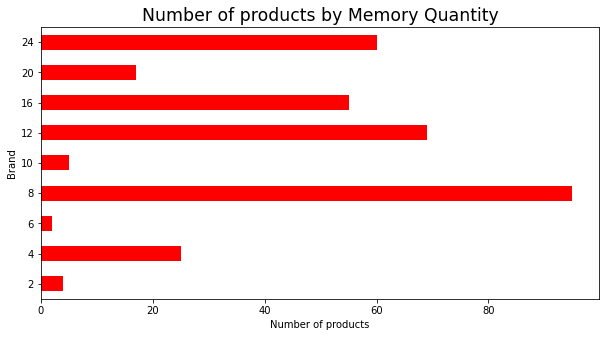

In [62]:
df_glob.groupby("Quantité Mémoire (Go)").count()["Nom_produit"].plot(kind="barh", figsize=(10,5), color="red")
plt.title("Number of products by Memory Quantity", fontsize="xx-large")
plt.xlabel("Number of products")
plt.ylabel("Brand")
plt.savefig("nb_products_by_memory.png")
plt.show()

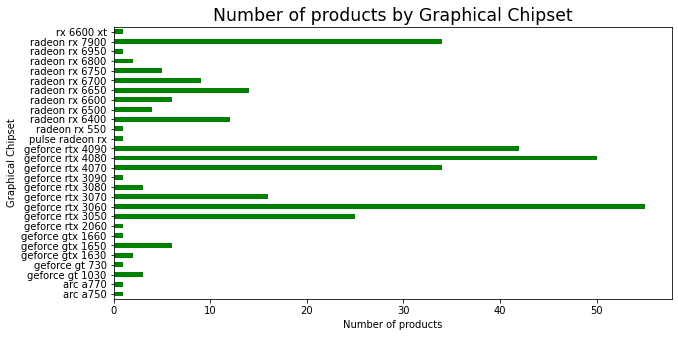

In [64]:
df_glob.groupby("Chipset Graphique").count()["Nom_produit"].plot(kind="barh", figsize=(10,5), color="green")
plt.title("Number of products by Graphical Chipset", fontsize="xx-large")
plt.xlabel("Number of products")
plt.ylabel("Graphical Chipset")
plt.savefig("nb_products_by_chipset.png")
plt.show()

In [65]:
df_glob.groupby("Chipset Graphique")[["Prix (€)"]].mean()

,Prix (€)
Chipset Graphique,
arc a750,379.990000
arc a770,459.990000
geforce gt 1030,125.946667
geforce gt 730,104.950000
geforce gtx 1630,189.955000
geforce gtx 1650,228.283333
geforce gtx 1660,349.940000
geforce rtx 2060,369.950000
geforce rtx 3050,373.169200


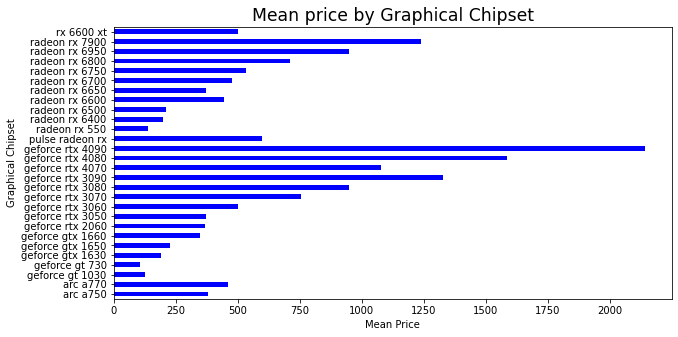

In [66]:
df_glob.groupby("Chipset Graphique")["Prix (€)"].mean().plot(kind="barh", figsize=(10,5), color="blue")
plt.title("Mean price by Graphical Chipset", fontsize="xx-large")
plt.xlabel("Mean Price")
plt.ylabel("Graphical Chipset")
plt.savefig("mean_price_by_chipset_bar.png")
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


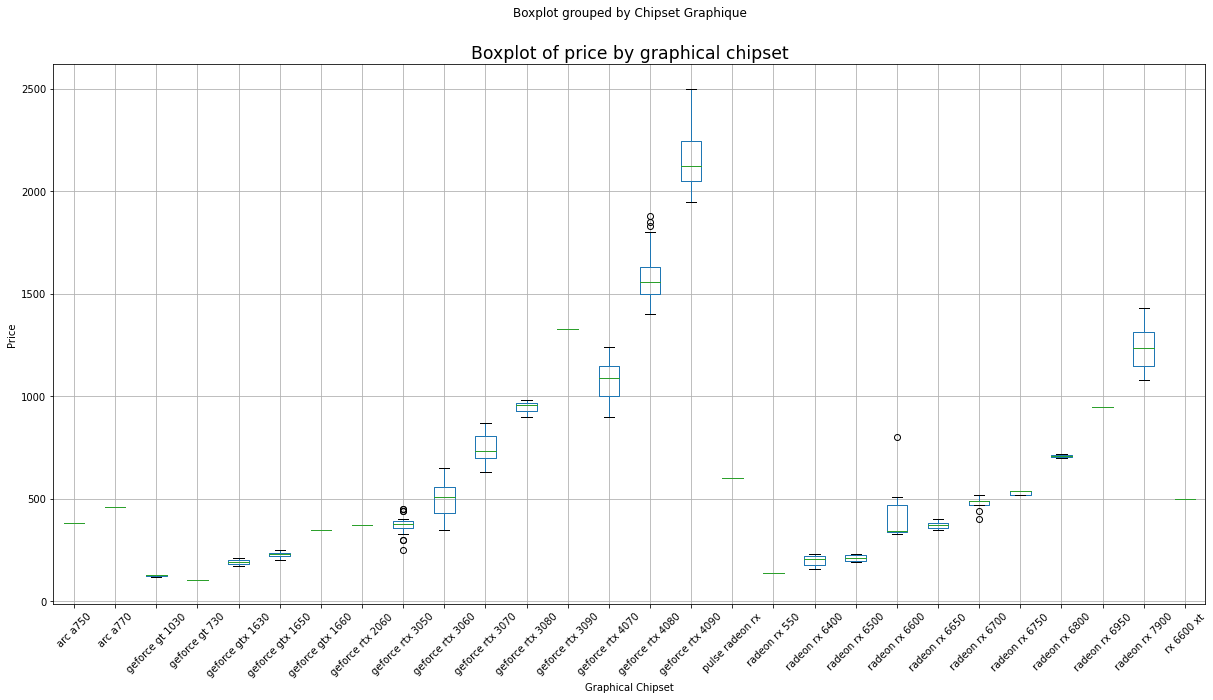

In [67]:
fig, ax = plt.subplots(figsize=(20,10))
df_glob.boxplot(column=['Prix (€)'], by=["Chipset Graphique"], ax=ax)
plt.setp(ax.get_xticklabels(), **{"rotation":45})
plt.title("Boxplot of price by graphical chipset", fontsize="xx-large")
plt.xlabel("Graphical Chipset")
plt.ylabel("Price")
plt.savefig("boxplot_price_by_chipset.png")
plt.show()

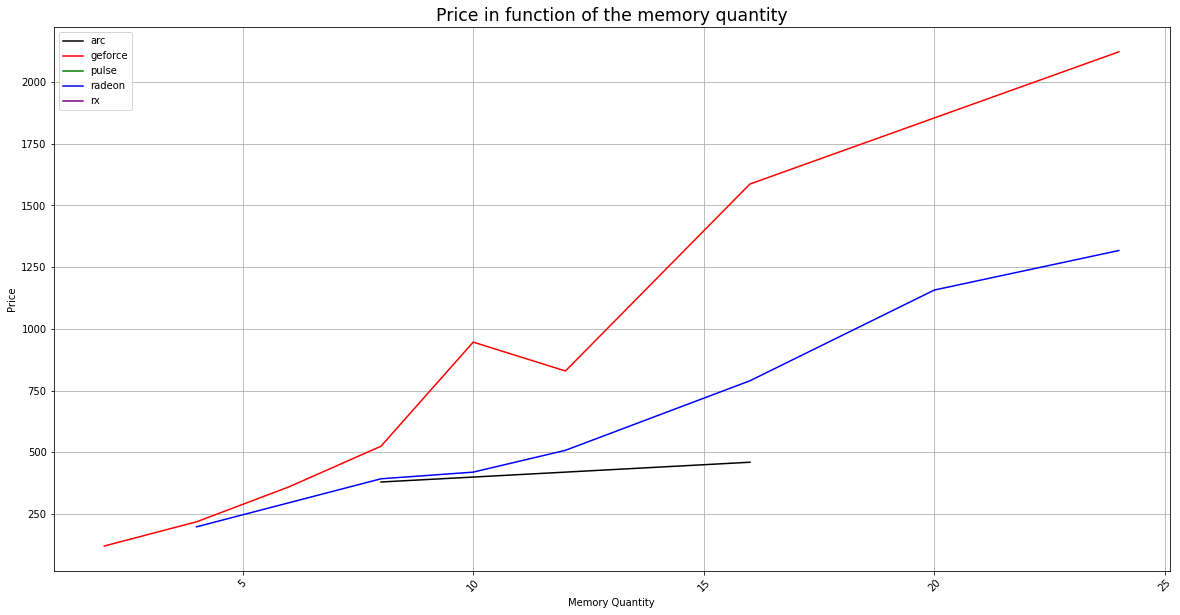

In [68]:
fig, ax = plt.subplots(figsize=(20,10))
legend, count = [], 0
for i, gp in df_glob.groupby("Type du GPU"):
    gp.groupby("Quantité Mémoire (Go)")[["Prix (€)"]].mean().plot(ax=ax, color=CUSTOM_PALETTE[count])
    count += 1
    legend.append(i)
plt.setp(ax.get_xticklabels(), **{"rotation":45})
plt.grid()
plt.legend(legend)
plt.title("Price in function of the memory quantity", fontsize="xx-large")
plt.xlabel("Memory Quantity")
plt.ylabel("Price")
plt.savefig("price_in_function_of_memory_tech.png")
plt.show()

In [ ]:
prices = pd.read_csv("Scrap_avec_prix_moyen.csv")

In [76]:
prices[["Nom_produit_ldlc", "Nom_produit_topachat", "Prix (€) ldlc", "Prix (€) topachat", "Prix Moyen (€)","Chipset Graphique"]].head(20)

,Nom_produit_ldlc,Nom_produit_topachat,Prix (€) ldlc,Prix (€) topachat,Prix Moyen (€),Chipset Graphique
0,kfa2 geforce rtx 3060 ti (1-click oc) lhr,kfa2 geforce rtx 3060 ti (1-click oc) (lhr),519.95,509.99,514.970,geforce rtx 3060
1,gigabyte radeon rx 6650 xt gaming oc 8g,gigabyte radeon rx 6650 xt gaming oc,359.95,349.99,354.970,radeon rx 6650
2,kfa2 geforce rtx 3060 (1-click oc) lhr,kfa2 geforce rtx 3060 (12 go) (1-click oc) (lhr),399.95,394.99,397.470,geforce rtx 3060
3,sapphire pulse radeon rx 6700 10gb,sapphire radeon rx 6700 pulse,439.96,399.99,419.975,radeon rx 6700
4,kfa2 geforce rtx 3050 ex (1-click oc) lhr,kfa2 geforce rtx 3050 ex (lhr),299.95,249.99,274.970,geforce rtx 3050
5,gigabyte geforce rtx 4080 gaming oc 16g,gigabyte geforce rtx 4080 gaming oc (16 go),1469.95,1469.99,1469.970,geforce rtx 4080
6,gigabyte geforce rtx 3060 eagle oc 12g (rev. 2...,gigabyte geforce rtx 3060 eagle oc rev 2.0 (12...,449.95,379.99,414.970,geforce rtx 3060
7,gainward geforce rtx 4070 ti phantom reunion,gainward geforce rtx 4070 ti phantom reunion (...,999.95,979.99,989.970,geforce rtx 4070
8,kfa2 geforce rtx 3060 (1-click oc) lhr,kfa2 geforce rtx 3060 (8 go) (1-click oc) (lhr),399.95,349.99,374.970,geforce rtx 3060
9,gainward geforce rtx 4080 phantom,gainward geforce rtx 4080 phantom (16 go),1469.95,1449.99,1459.970,geforce rtx 4080


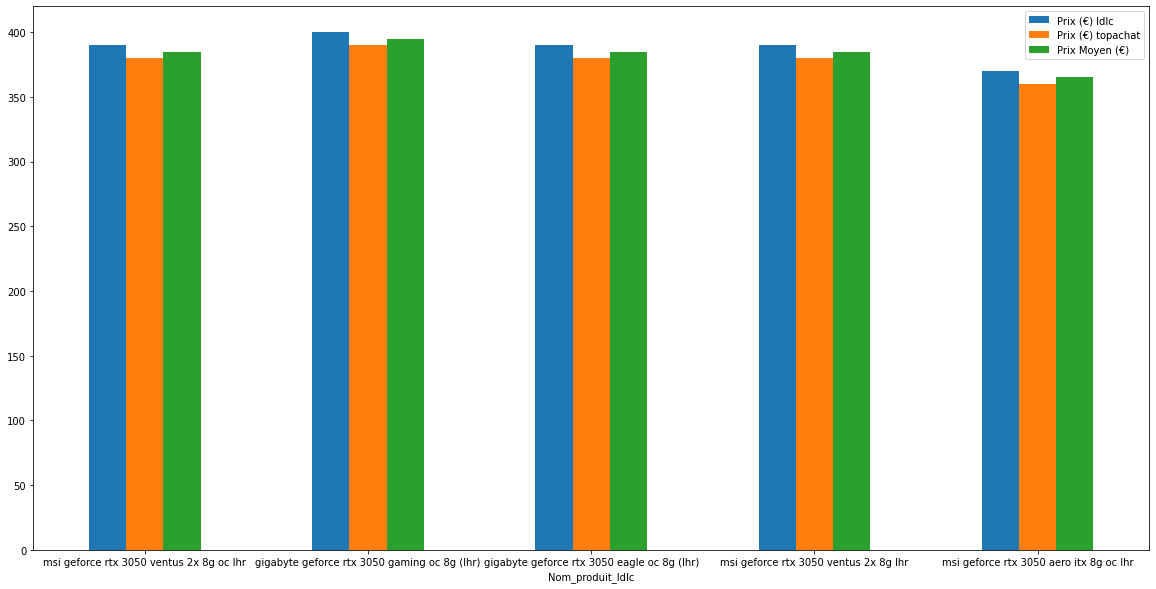

In [77]:
ax = prices.sort_values("Chipset Graphique").head().plot(x="Nom_produit_ldlc", y=["Prix (€) ldlc", "Prix (€) topachat", "Prix Moyen (€)"], kind="bar", rot=0, figsize=(20,10))

In [78]:
df_glob.head()

,Nom_produit,Chipset Graphique,Marque,Quantité Mémoire (Go),Type Mémoire,Bus,Prix (€),Site Internet,Longueur,Largeur,Epaisseur,Type du GPU
0,kfa2 geforce rtx 3060 ti (1-click oc) (lhr),geforce rtx 3060,kfa2,8,gddr6,pci express 4.0,509.99,topachat.com,256.0,132.0,42.0,geforce
1,gigabyte radeon rx 6650 xt gaming oc,radeon rx 6650,gigabyte,8,gddr6,pci express 4.0,349.99,topachat.com,282.0,115.0,50.0,radeon
2,kfa2 geforce rtx 3060 (12 go) (1-click oc) (lhr),geforce rtx 3060,kfa2,12,gddr6,pci express 4.0,394.99,topachat.com,258.0,126.0,42.0,geforce
3,sapphire radeon rx 6700 pulse,radeon rx 6700,sapphire,10,gddr6,pci express 4.0,399.99,topachat.com,260.0,120.0,49.0,radeon
4,kfa2 geforce rtx 3050 ex (lhr),geforce rtx 3050,kfa2,8,gddr6,pci express 4.0,249.99,topachat.com,224.0,133.0,44.0,geforce
